In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

# 4.1.2 Normal by multiplication

The next example given is one where current populations are handled by the growth rate, thus there is a multiplicative effect through time as populations grow and shrink.

To model that we have the following prompt:

> Here’s another way to get a normal distribution. Suppose
the growth rate of an organism is influenced by a dozen loci, each with several alleles that
code for more growth. Suppose also that all of these loci interact with one another, such that
each increase growth by a percentage. This means that their effects multiply, rather than add.

Here is my simulation of the prompt

In [62]:
def simulate_one_population(periods=12, growth_rate=0.1):
    rates = np.random.uniform(low=1.0, high=1 + growth_rate, size=(periods,))
    return np.cumprod(rates)

def simulate_many_populations(pops=1, periods=12, growth_rate=0.1):
    rates = np.random.uniform(low=1.0, high=1 + growth_rate, size=(pops, periods))
    return np.cumprod(rates, axis=1)

In [63]:
simulate_one_population(periods=5)

array([1.0815251 , 1.14665627, 1.25949104, 1.27968329, 1.31411509])

# single simulation

Above we have the single simulation. Notice the product grows over time. This is because we limited the bounds of the random variable between 1.0 and 1.1.

In [64]:
all_rates = simulate_many_populations(pops=50, periods=100)
all_rates

array([[  1.02785719,   1.12271887,   1.21228329, ...,  83.06695588,
         87.80570696,  88.16119734],
       [  1.0667522 ,   1.0721438 ,   1.0809688 , ..., 106.69863549,
        107.64293222, 109.48524531],
       [  1.09094395,   1.17079996,   1.21472543, ..., 204.76708355,
        224.4418134 , 241.98424775],
       ...,
       [  1.0908342 ,   1.16157289,   1.27555551, ..., 159.1988852 ,
        161.6477534 , 166.42500375],
       [  1.08956877,   1.19454052,   1.30067783, ..., 112.89310212,
        121.2741851 , 123.99651718],
       [  1.0222774 ,   1.05407792,   1.11137934, ..., 132.10751791,
        135.15502633, 145.57128909]])

# multiple simulations
Above we have multiple simulations. Each axis=0 of the tensor shows us the first growth period, and the last value is hte final growth period for each sample/population

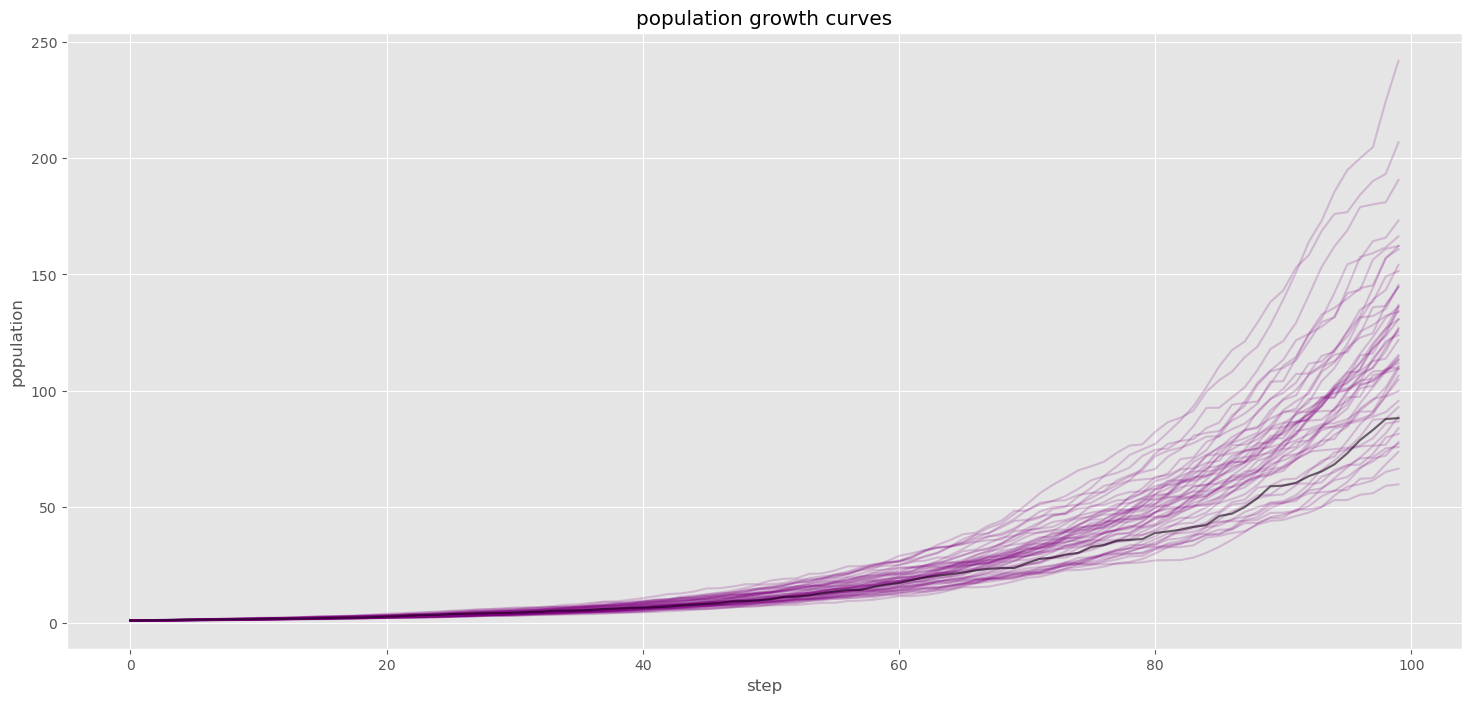

In [65]:
plt.figure(figsize=(18, 8))
ax = plt.gca()
ax.set_xlabel('step')
ax.set_ylabel('population')
ax.set_title('population growth curves')

for pop_rates in all_rates:
    ax.plot(pop_rates, color='purple', alpha=0.2)

ax.plot(all_rates[0], color='black', alpha=0.5)

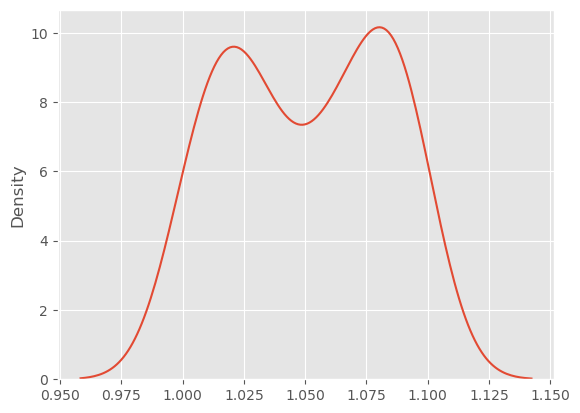

<AxesSubplot:ylabel='Density'>

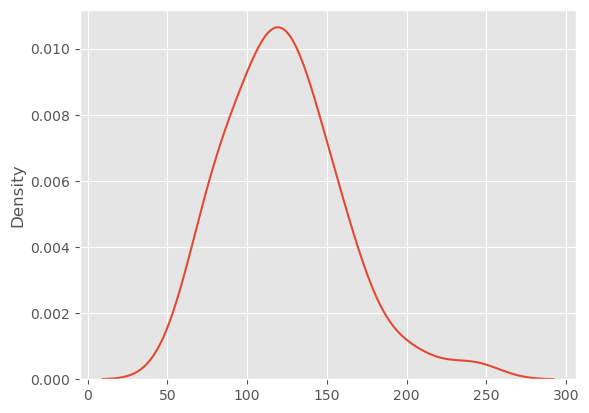

In [66]:
sns.kdeplot(all_rates[:,0])
plt.show()
sns.kdeplot(all_rates[:,-1])

# Density Plot

We can see that the plot has become approximately normal over the iterations. Increases the iterations shows a more approximately normal distribution

<AxesSubplot:ylabel='Density'>

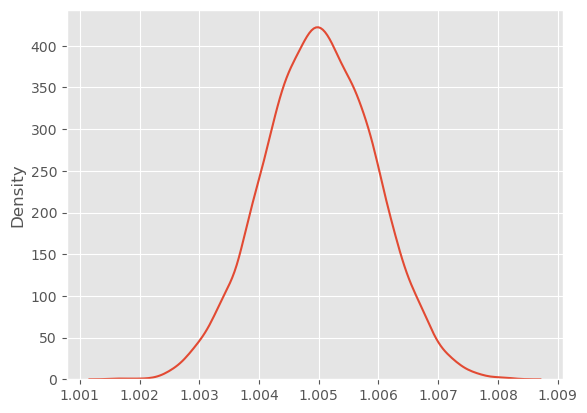

In [86]:
low_rates = simulate_many_populations(pops=10000, periods=10, growth_rate=0.001)
sns.kdeplot(low_rates[:,-1])

<AxesSubplot:ylabel='Density'>

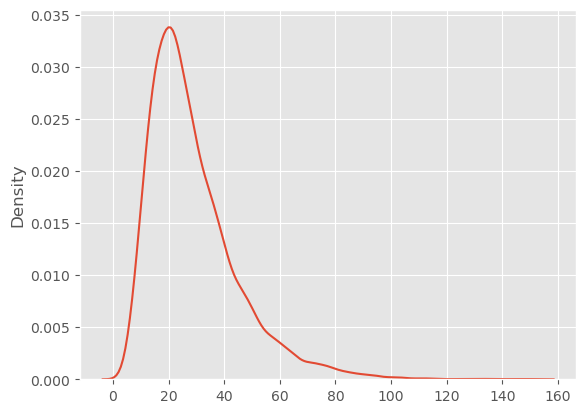

In [83]:
high_rates = simulate_many_populations(pops=10000, periods=10, growth_rate=0.8)
sns.kdeplot(high_rates[:,-1])

# At large growth rates

Notice at large growth rates they are not naturally gaussian. We need to invoke the log scale to get it to match the way we expect

<AxesSubplot:ylabel='Density'>

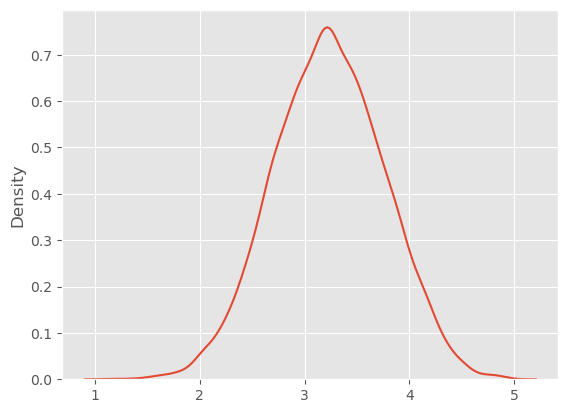

In [82]:
high_rates = np.log(simulate_many_populations(pops=10000, periods=10, growth_rate=0.8))
sns.kdeplot(high_rates[:,-1])

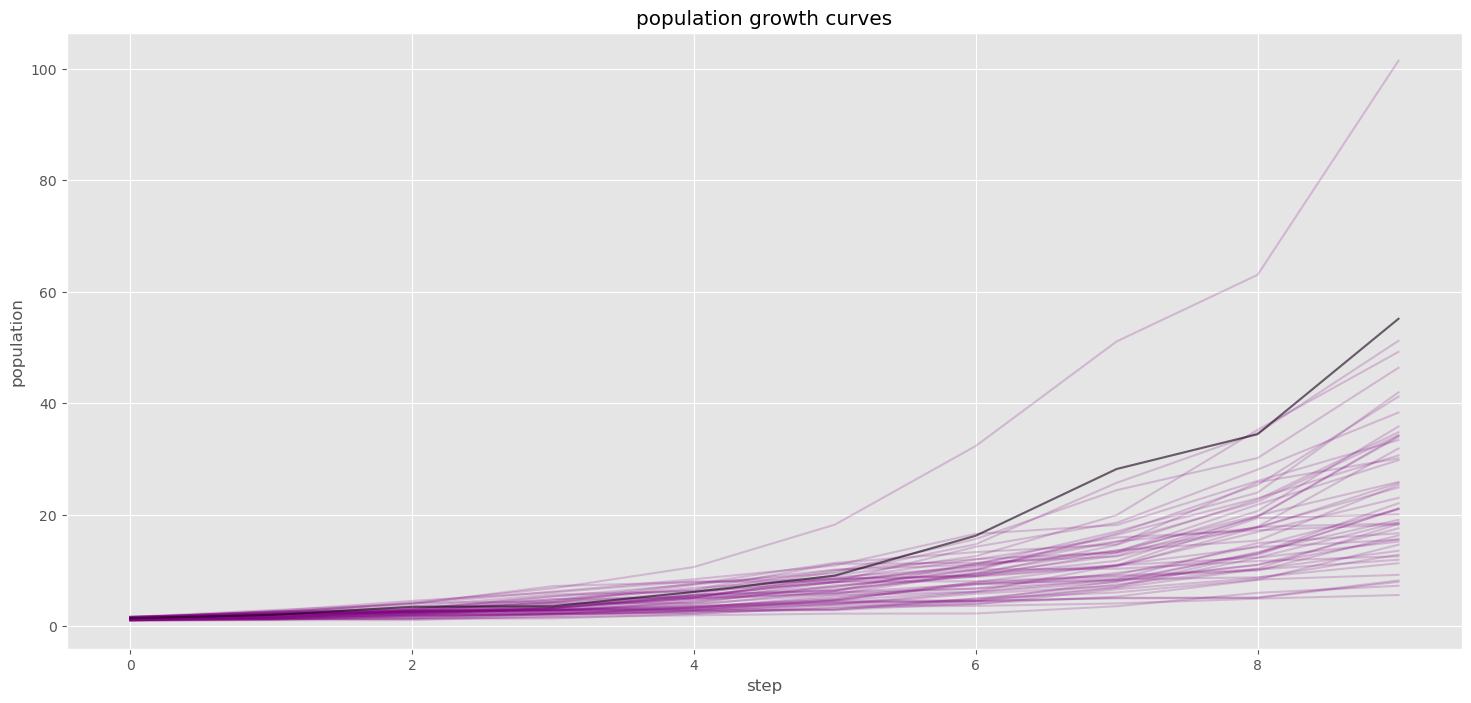

In [90]:
plt.figure(figsize=(18, 8))
ax = plt.gca()
ax.set_xlabel('step')
ax.set_ylabel('population')
ax.set_title('population growth curves')

for pop_rates in high_rates[:50]:
    ax.plot(pop_rates, color='purple', alpha=0.2)

ax.plot(high_rates[0], color='black', alpha=0.5)